<a href="https://colab.research.google.com/github/2303A52164/Generative_ai_2025/blob/main/Generative_AI_2303A52164_Week_No_8_Assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI - Assignment - 8.1**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/winequality-red.csv')

In [3]:
# Splitting features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target (Wine Quality)

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Build ANN Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(25, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification (modify if needed)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0000e+00 - loss: 0.4599 - val_accuracy: 0.0000e+00 - val_loss: 0.4529
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.4837 - val_accuracy: 0.0000e+00 - val_loss: 0.4499
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4742 - val_accuracy: 0.0000e+00 - val_loss: 0.4470
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4816 - val_accuracy: 0.0000e+00 - val_loss: 0.4439
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.4727 - val_accuracy: 0.0000e+00 - val_loss: 0.4409
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 0.4373 - val_accuracy: 0.0000e+00 - val_loss: 0.4378
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.4340 - val_accuracy: 0.0000e+00 - val_loss: 0.4346
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [9]:
# Save model
model.save('wine_quality_model.h5')

In [10]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = np.mean(y_pred == y_test.reshape(-1, 1))
print(f'Test Accuracy: {accuracy:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
Test Accuracy: 0.0000


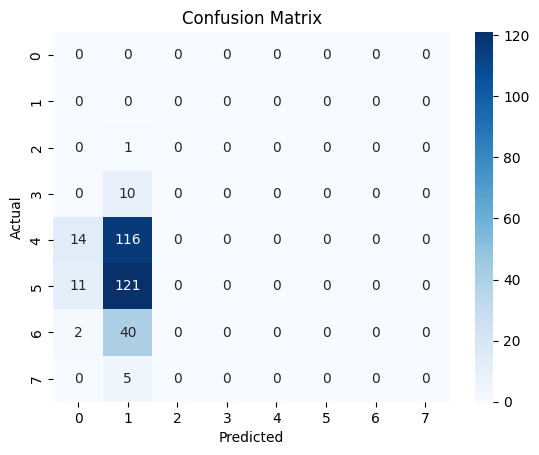

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [12]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00      10.0
           5       0.00      0.00      0.00     130.0
           6       0.00      0.00      0.00     132.0
           7       0.00      0.00      0.00      42.0
           8       0.00      0.00      0.00       5.0

    accuracy                           0.00     320.0
   macro avg       0.00      0.00      0.00     320.0
weighted avg       0.00      0.00      0.00     320.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [13]:
# Load and use saved model
loaded_model = keras.models.load_model('wine_quality_model.h5')
sample_input = X_test[:1]  # Example input
prediction = loaded_model.predict(sample_input)
print(f'Predicted Quality: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Predicted Quality: [[0.49903706]]
